In [1]:
import numpy as np
import pandas as pd
from scipy import sparse

from matplotlib import pyplot as plt
from matplotlib import animation
from seaborn import heatmap, color_palette

# Literrature

Activation function on performance has been studied for classic deep learning but no theory came to support the phenomenon observed 

https://www.researchgate.net/publication/315380776_Analysis_of_Performance_of_Various_Activation_Functions_for_doing_the_logic_programming_in_Hopfield_Network
https://www.researchgate.net/publication/228813985_Performance_Analysis_of_Various_Activation_Functions_in_Generalized_MLP_Architectures_of_Neural_Networks
https://www.researchgate.net/publication/320511751_A_comparative_performance_analysis_of_different_activation_functions_in_LSTM_networks_for_classification

In [2]:
from reservoir.utility import show_matrice, show_ei_matrix

In [19]:
from importlib import reload
import reservoir.reservoir

from reservoir.reservoir import update_reservoir, ridge_regression, train, run
from reservoir.reservoir import init_matrices

reload(reservoir.reservoir)

# SEED
SEED = 3789

# Helper function to use the capacities data structure coming out of the iterator
# cap2vec collates all capacities with same maximal delay and degree up to given maximal values
def cap2vec(capacities,maxdel=1000,maxdeg=10):
    vec = np.zeros((maxdel,maxdeg))
    for idx in range(len(capacities)):
        delay=capacities[idx]['delay']
        degree=capacities[idx]['degree']
        if (delay<=maxdel) and (degree<=maxdeg):
            vec[delay-1,degree-1]+=capacities[idx]['score']
    return vec

In [14]:
# Parameters
n = 50 # number of neurons
SEED = 3789
leaky_rate = 1
input_scaling = 1

spectral_radius = 1.45
input_connectivity =  0.745
connectivity = 0.075

# HPERPARAMETERS
INCREMENT = 20
VALUE = 0.1
bias_scaling = 1

# Initialisation
Win, W, bias =  init_matrices(n, input_connectivity, connectivity, spectral_radius, seed = SEED)
bias = bias*bias_scaling
Win = Win*input_scaling

# last_state
last_state = np.random.uniform(0, 1, n)

# Number of time steps: you can use 1e5 for quick-and-dirty, but 1e6 is better
warmup_steps = 500
warmups = 2.0*np.random.rand(warmup_steps,1)-1.0

# Important: capacity theory with Legendre polynomials assumes uniform random inputs in [-1,1]
steps = 50000
inputs = 2.0*np.random.rand(steps,1)-1.0
state = last_state

# Test on different activation function

## Sigmoïd

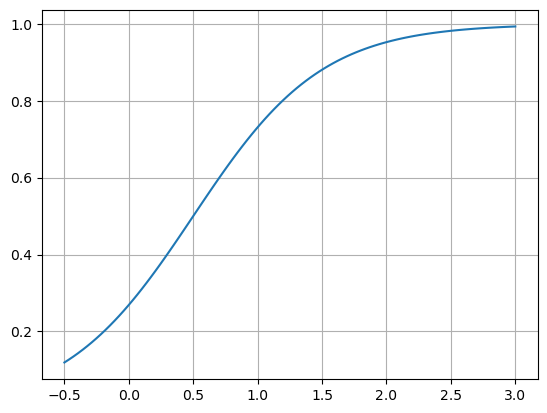

In [15]:
from reservoir.activation_functions import sigmoid
activation_function = lambda x : sigmoid(2*(x-0.5))

plt.plot(np.linspace(-0.5, 3, 100), activation_function(np.linspace(-0.5, 3, 100)))
plt.grid()

for i in range(warmup_steps):
    state = update_reservoir(W, Win, warmups[i], state, leaky_rate, bias, activation_function)

capa_history = []
for i in range(steps):
    state = update_reservoir(W, Win, inputs[i], state, leaky_rate, bias, activation_function)
    capa_history.append(state)
capa_history = np.array(capa_history)

In [16]:
import Capacities.capacities as CAP

# Measallcapsure capacities on inputs and states after removing a "warmup period"
# If you require more extensive printed output of individual capacities:
# set verbose = 1
Citer=CAP.capacity_iterator(maxdeg=5)#, verbose = 1)
totalcap,allcaps,numcaps,nodes = Citer.collect(inputs,capa_history)

print("\nMeasured ",numcaps," capacities above threshold.\nTotal capacity = ",totalcap)

Estimated rank of state covariance matrix =  50
Total score for degree  1  =  4.4123100097165295 (cumulative total =  4.4123100097165295 )
Total score for degree  2  =  9.31219270228987 (cumulative total =  13.724502712006402 )
Total score for degree  3  =  12.017747180455771 (cumulative total =  25.74224989246217 )
Total score for degree  4  =  10.784089537541954 (cumulative total =  36.52633943000412 )
Total score for degree  5  =  7.2278086784477855 (cumulative total =  43.75414810845189 )
Total score for degree  6  =  4.527817207424595 (cumulative total =  48.28196531587651 )
Total capacity=57.832 (115.66 percent)

Measured  1000000  capacities above threshold.
Total capacity =  57.83178433561925


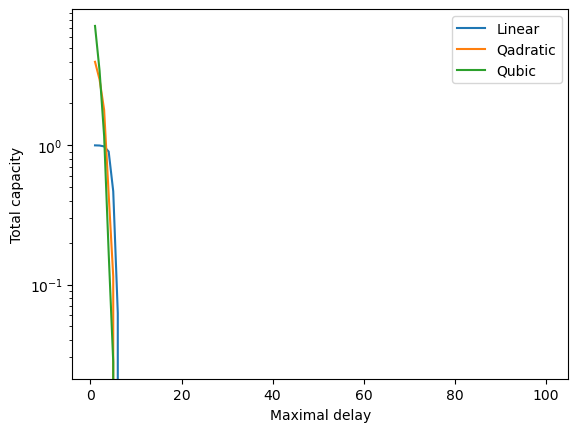

In [20]:
maxdel = 100
maxdeg = 6
V = cap2vec(allcaps,maxdel = maxdel, maxdeg = maxdeg)

delrange = np.arange(1,maxdel+1)
totcap = np.sum(V,axis=1)
plt.figure()
plt.semilogy(delrange,V[:,0],label='Linear')
plt.plot(delrange,V[:,1],label='Qadratic')
plt.plot(delrange,V[:,2],label='Qubic')

plt.xlabel('Maximal delay')
plt.ylabel('Total capacity')
plt.legend()
plt.show()

## Tanh

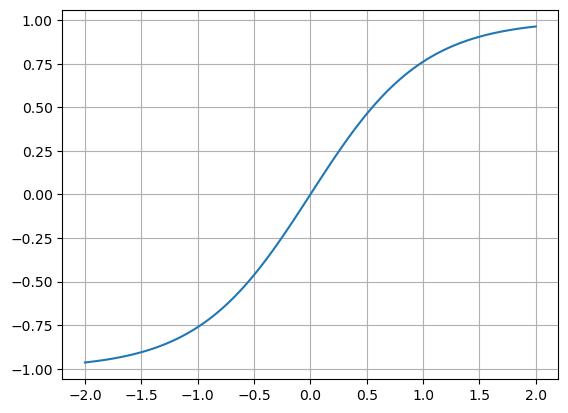

In [21]:
from reservoir.activation_functions import tanh
activation_function = lambda x : tanh(x)

plt.plot(np.linspace(-2, 2, 100), activation_function(np.linspace(-2, 2, 100)))
plt.grid()

for i in range(warmup_steps):
    state = update_reservoir(W, Win, warmups[i], state, leaky_rate, bias, activation_function)

capa_history = []
for i in range(steps):
    state = update_reservoir(W, Win, inputs[i], state, leaky_rate, bias, activation_function)
    capa_history.append(state)
capa_history = np.array(capa_history)

In [28]:
import Capacities.capacities as CAP

# Measallcapsure capacities on inputs and states after removing a "warmup period"
# If you require more extensive printed output of individual capacities:
# set verbose = 1
Citer=CAP.capacity_iterator(maxwindow=20)#, verbose = 1)
totalcap,allcaps,numcaps,nodes = Citer.collect(inputs,capa_history)

print("\nMeasured ",numcaps," capacities above threshold.\nTotal capacity = ",totalcap)

Estimated rank of state covariance matrix =  50
Total score for degree  1  =  4.095388653081664 (cumulative total =  4.095388653081664 )
Total score for degree  2  =  8.198791275871827 (cumulative total =  12.294179928953493 )
Total score for degree  3  =  11.090262295091232 (cumulative total =  23.384442224044715 )
Total score for degree  4  =  10.538743836102247 (cumulative total =  33.92318606014695 )
Total score for degree  5  =  8.467237772779276 (cumulative total =  42.39042383292619 )
Total score for degree  6  =  15.248393837173175 (cumulative total =  57.63881767009943 )
Total score for degree  7  =  76.69340411616827 (cumulative total =  134.33222178626752 )
Total score for degree  8  =  389.33982631305065 (cumulative total =  523.6720480993192 )
Total capacity=560.065 (1120.13 percent)

Measured  1000000  capacities above threshold.
Total capacity =  560.0653313709978


In [ ]:
maxdel = 100
maxdeg = 6
V = cap2vec(allcaps,maxdel = maxdel, maxdeg = maxdeg)

delrange = np.arange(1,maxdel+1)
totcap = np.sum(V,axis=1)
plt.figure()
plt.semilogy(delrange,V[:,0],label='Linear')
plt.plot(delrange,V[:,1],label='Qadratic')
plt.plot(delrange,V[:,2],label='Qubic')

plt.xlabel('Maximal delay')
plt.ylabel('Total capacity')
plt.legend()
plt.show()

## Heavyside

In [ ]:
from reservoir.activation_functions import heaviside
activation_function = lambda x : heaviside(x)

plt.plot(np.linspace(-2, 2, 100), activation_function(np.linspace(-2, 2, 100)))
plt.grid()

for i in range(warmup_steps):
    state = update_reservoir(W, Win, warmups[i], state, leaky_rate, bias, activation_function)

capa_history = []
for i in range(steps):
    state = update_reservoir(W, Win, inputs[i], state, leaky_rate, bias, activation_function)
    capa_history.append(state)
capa_history = np.array(capa_history)

In [ ]:
import Capacities.capacities as CAP

# Measallcapsure capacities on inputs and states after removing a "warmup period"
# If you require more extensive printed output of individual capacities:
# set verbose = 1
Citer=CAP.capacity_iterator(maxdeg=5)#, verbose = 1)
totalcap,allcaps,numcaps,nodes = Citer.collect(inputs,capa_history)

print("\nMeasured ",numcaps," capacities above threshold.\nTotal capacity = ",totalcap)

In [ ]:
maxdel = 100
maxdeg = 6
V = cap2vec(allcaps,maxdel = maxdel, maxdeg = maxdeg)

delrange = np.arange(1,maxdel+1)
totcap = np.sum(V,axis=1)
plt.figure()
plt.semilogy(delrange,V[:,0],label='Linear')
plt.plot(delrange,V[:,1],label='Qadratic')
plt.plot(delrange,V[:,2],label='Qubic')

plt.xlabel('Maximal delay')
plt.ylabel('Total capacity')
plt.legend()
plt.show()